# U.S. Medical Insurance Costs 

Hi! Welcome to my first porfolio project of Codecademy. I will be analysing the given insurance.csv dataset on US Medical Insurance Costs and answer the following questions:

1. Percentage of female versus male smokers
2. Average number of children for smokers versus non-smokers
2. Average BMI of smokers versus non-smokers
3. Average medical insurance charges for smokers vs non-smokers


I will also be analysing the correlation between various factors, 


Would greatly appreciate any feedback/critique about areas for improvement! Thank you for your time in reading through my project!

### Importing the necessary libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


### Importing the insurance.csv dataset

In [70]:
insurance = pd.read_csv('insurance.csv')

### Exploring the dataset

In [71]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
insurance.dtypes
###sex, smoker and region are categorical variables
###BMI, charges, age and children are numerical variables

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [73]:
insurance.info()
###there is no null/missing data in the insurance dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Analysing and Visualizing the dataset

Let's first take a look at the distribution of age in the given dataset.

In [74]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


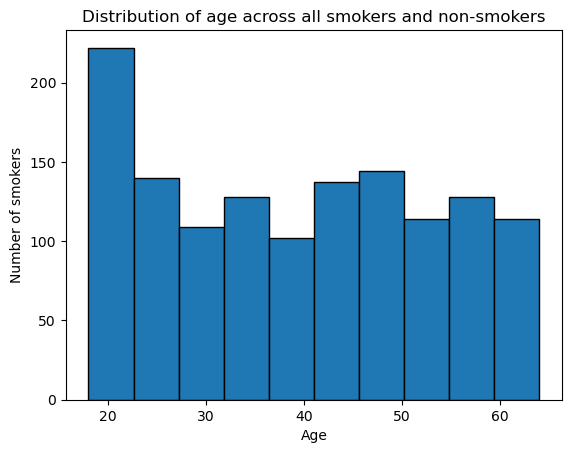

In [75]:
plt.hist(insurance['age'], bins = 10, edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Number of smokers')
plt.title('Distribution of age across all smokers and non-smokers')
plt.show()

As seen in the histogram above, the dataset is slightly **right-skewed**, as there are more individuals falling in the younger age range of 20-30, for instance, as compared to the older age ranges of 50-60, with **over 200 individuals in their 20s.**



## Q1: Percentage of female vs male smokers and non-smokers

Let's now look at the sex distribution of both smokers and non-smokers.

In [76]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
male_smokers = insurance[(insurance['sex'] == 'male') & (insurance['smoker'] == 'yes')]
smokers = insurance[insurance['smoker'] == 'yes']
print((len(male_smokers) / len(smokers)) * 100)

58.02919708029197


As seen from above, approximately **58%** of **smokers** are **male** while **42%** are **female**. 

Let's now delve into the non-smoker gender distribution.

In [78]:
male_non_smokers = insurance[(insurance['sex'] == 'male') & (insurance['smoker'] == 'no')]
non_smokers = insurance[insurance['smoker'] == 'no']
print((len(male_non_smokers) / len(non_smokers)) * 100)

48.59022556390977


Unlike the predominant male demographic in the smoking population, **less than half** of the non-smoking population are **males** (approximately **48.6%**).



## Q2: Average number of children for smokers vs non-smokers

In [79]:
smokers = insurance[insurance['smoker'] == 'yes']
print(len(smokers))

274


In [80]:
smokers_avg_children = smokers['children'].sum() / 274
print(smokers_avg_children)

1.1131386861313868


The **smoking population** in the given dataset has an **average of 1 child** (rounded down).

In [81]:
non_smokers = insurance[insurance['smoker'] == 'no']
print(len(non_smokers))

1064


In [82]:
ns_avg_children = non_smokers['children'].sum()/ 1064
print(ns_avg_children)

1.0902255639097744


The non-smoking population also has an average of 1 child (rounded down). However, the numerical average for the smoking population is slightly higher than that of the non-smoking population, hence we can infer that the higher medical insurance bills(on average) from poorer health do not really deter the smokers from having more kids. 

## Q3: Average BMI of smokers versus non-smokers

In [83]:
avg_bmi_smokers = smokers['bmi'].sum() / len(smokers)
print(avg_bmi_smokers)

30.70844890510949


In [84]:
avg_bmi_non_smokers = non_smokers['bmi'].sum() / len(non_smokers)
print(avg_bmi_non_smokers)

30.651795112781954


The BMI of smokers is only **slightly higher by about 0.5** than that of non-smokers. While **smoking leads to increased visceral belly fat** which directly translates to **weight gain**, the nicotine in cigarettees also **suppresses appetite** by triggering a pathway in the brain that leads to a **feeling of satiety, a reduced desire to eat**. Hence, taking both of these factors into consideration, a possible explanation for the **largely similar BMI of smokers and non-smokers** is that the **effects of both the factors cancel each other out**. 

## Q4. Average medical insurance costs of smokers vs non-smokers

In [85]:
avg_costs_smokers = smokers['charges'].sum() / len(smokers)
print(avg_costs_smokers)

32050.23183153284


In [86]:
avg_costs_non_smokers = non_smokers['charges'].sum() / len(non_smokers)
print(avg_costs_non_smokers)

8434.268297856204


Based on the results above, the average medical insurance costs is much higher by **almost $24,000** in the **smoking population**. This could largely be attributed to the fact that their smoking habit **significantly increases their risk of developing serious health conditions** like heart disease, stroke, and cancer, which leads to a **higher probability of seeking healthcare and filing insurance claims**.

## Correlation between variables

We will now be delving into the correlation between the different variables.

## A. Region and Profile(Smoker/Non-smoker)

Since both region and profile are categorical variables, we can use a **contingency table** to determine their correlation with each other.

In [87]:
cont_table = pd.crosstab(insurance['smoker'], insurance['region'])
cont_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [88]:
cont_table_proportions = (cont_table / len(insurance)) *100

In [89]:
cont_table_proportions

region,northeast,northwest,southeast,southwest
smoker,,,,
no,19.207773,19.955157,20.403587,19.955157
yes,5.007474,4.334828,6.801196,4.334828


In [91]:
chi2, pval, dof, expected = chi2_contingency(cont_table)
print(pval)


0.06171954839170547


Since the **calculated p-value of (approximately) 0.062 > 0.05(chosen significance level)**, we can **reject the null hypothesis** that the region and profile variables are significantly different from each other, hence concluding that **there is association** between the 2 variables. 

This conclusion also aligns with what we observe in the contingency table, whereby a higher proportion of the smoking population is made up of those from the southeast region of America as compared to the 3 other regions.

## B. Age and Charges